## Essay

As a Population Health Analyst at a hospital, I am continuously seeking ways to improve patient outcomes for patients. One area of particular interest is the early detection and management of chronic conditions such as diabetes, which can significantly impact patient health and well-being. In this essay, I explore the application of predictive modeling techniques to datasets containing information on patients' characteristics and diabetes diagnosis. Specifically, I analyze two datasets: one small with 2768 observations and another large with 100,000 observations. My goal is to understand how different algorithms perform in predicting diabetes and to identify the most influential features contributing to diabetes diagnosis.

The small dataset comprises ten columns, including patient characteristics such as pregnancies, glucose levels, and BMI, as well as the diabetes outcome. Initial analysis reveals no clear correlation between blood pressure values and diabetes, while BMI exhibits a significant association with diabetes risk. Similarly, the large dataset shows similar characteristics, with age and BMI standing out as significant predictors of diabetes. Particularly in the large dataset, individuals show increased risk of diabetes once their BMI surpasses 20, as people age, leading to higher BMIs and increased likelihood of diabetes diagnosis across genders. Notably, age and BMI emerge as significant predictors of diabetes in both datasets.

Logistic regression is initially chosen for its simplicity, interpretability, and suitability for binary classification tasks like diabetes prediction. It provides a baseline performance metric and helps understand linear relationships between features and the likelihood of diabetes. However, as decision tree and ensemble models outperform logistic regression in both datasets with accuracies of 97% and 96.72% respectively, they become the primary focus. Decision trees capture complex relationships and interactions between features, while ensemble methods like random forest and gradient boosting further enhance predictive accuracy by reducing overfitting and improving generalization performance. Overall, the choice of these algorithms is driven by their ability to handle complex relationships in the data and their superior performance in predicting diabetes risk.

Feature importance analysis reveals that glucose, BMI, and pregnancies are significant predictors of diabetes across both datasets. Moreover, age emerges as a crucial predictor in the large dataset, underscoring the impact of demographic factors on diabetes risk. Notably, the correlation between features varies between datasets, emphasizing the importance of dataset-specific analysis in predictive modeling.

In a business context, the choice of algorithm depends on the trade-off between interpretability and predictive accuracy. While logistic regression offers interpretability, decision tree-based algorithms provide superior predictive performance. For critical decision-making, such as identifying high-risk individuals for diabetes prevention programs, models with higher accuracy, such as gradient boosting, would be preferred.

Both using too much, and too little data can lead to errors in analysis. While using too much data may introduce noise and overfitting, using too little data may result in underfitting and limited model generalization. Therefore, it is essential to strike a balance between data volume and model complexity to ensure robust and reliable predictions.

Predictive modeling offers valuable insights into diabetes risk prediction, enabling early intervention and personalized healthcare strategies. By leveraging patient characteristics and diagnostic information, we demonstrate the effectiveness of decision tree-based algorithms in accurately predicting diabetes risk. Moreover, feature importance analysis highlights the critical role of glucose, BMI, and age in predicting diabetes across diverse datasets. Overall, this study underscores the importance of leveraging predictive modeling techniques to improve healthcare outcomes and inform decision-making in diabetes management.


## Pre-work

In this assignment, we want to perform various analyses and build predictive models to understand factors influencing diabetes and predict patients with diabetes based on the given features using 2 datasets from Kaggle https://www.kaggle.com/datasets

The datasets share identical structures. The data is structed in a table and have patient attributes like age, gender, and diabetes status.

Small data: https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes

Big data: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data

The sizes of the data differ significantly, with the smaller dataset containing around 3000 rows and the larger dataset containing 100,000 rows.

This makes logistic regression an appropriate starting point for analysis, while more advanced algorithms like Random Forest or Gradient Boosting could be advantageous for the larger dataset.

## Import libraries

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
warnings.filterwarnings("ignore")

## Load data into dataframe


In [3]:
## Load the small data: Added the data to my GitHub for reproducibility
dataS = pd.read_csv('https://raw.githubusercontent.com/Kossi-Akplaka/Data622/main/Assignment%201/Healthcare-Diabetes%20-%20Small%20Data.csv')

## Load the big data
dataB = pd.read_csv('https://raw.githubusercontent.com/Kossi-Akplaka/Data622/main/Assignment%201/diabetes_prediction_dataset%20-%20Big%20Data.csv')

## Small data

Let's perform data analysis on the small data.

### Data understanding

In [53]:
dataS.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Shape of the data
dataS.shape

(2768, 10)

In [5]:
dataS.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
dataS.nunique()

Id                          2768
Pregnancies                   17
Glucose                      136
BloodPressure                 47
SkinThickness                 53
Insulin                      187
BMI                          253
DiabetesPedigreeFunction     523
Age                           52
Outcome                        2
dtype: int64

In [9]:
dataS.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [13]:
dataS.Outcome.unique()

array([1, 0])

The small dataset contains 2768 rows and 10 columns. The column 'Id' is unique for each patient and identifies patients.

The 'BMI' stands out with an average value of 8. The patients' ages range from 21 to 81 years, covering a significant span of adulthood.

There are two distinct outcomes represented in the 'Outcome' column, with 0 for patients without diabetes and 1 indicating patients diagnosed with diabetes.

### Data cleaning

In [14]:
#  Data type
dataS.dtypes

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [21]:
# Missing values
dataS.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The small dataset is clean and has no missing data.

### Features relationship

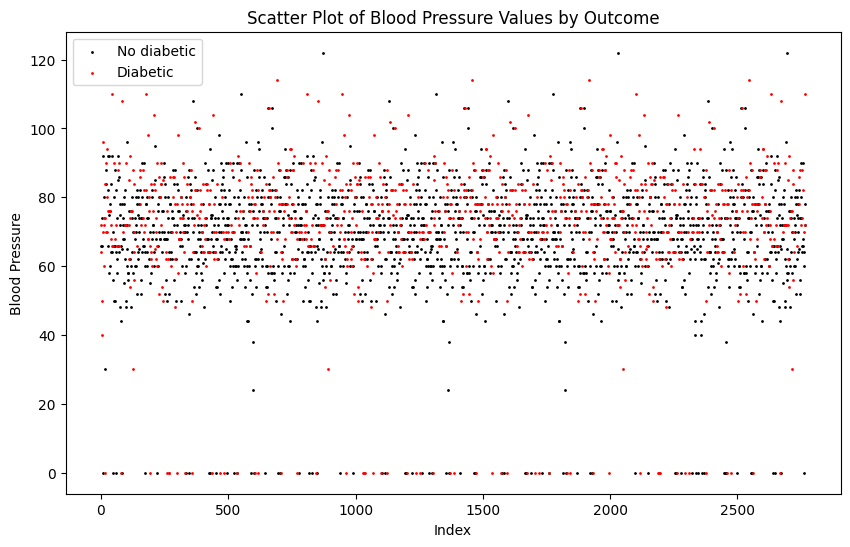

In [45]:
# Let's plot the relationship between a patient's blood pressure value and the presence or absence of diabetes.

# Create a scatter plot for outcome 0
plt.figure(figsize=(10, 6))
plt.scatter(dataS.index[dataS['Outcome'] == 0], dataS.loc[dataS['Outcome'] == 0, 'BloodPressure'], color='black', s = 1, label='No diabetes')

# Create a scatter plot for outcome 1
plt.scatter(dataS.index[dataS['Outcome'] == 1], dataS.loc[dataS['Outcome'] == 1, 'BloodPressure'], color='red', s = 1, label='Diabetes')

# Add legend
plt.title('Scatter Plot of Blood Pressure Values by Outcome')
plt.xlabel('Index')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()

Based on the plotted data, there doesn't seem to be a discernible pattern indicating that blood pressure values alone directly correlate with the presence of diabetes.

This lack of correlation may be attributed to the variability in blood pressure levels throughout the day, which can fluctuate significantly based on factors such as stress levels.

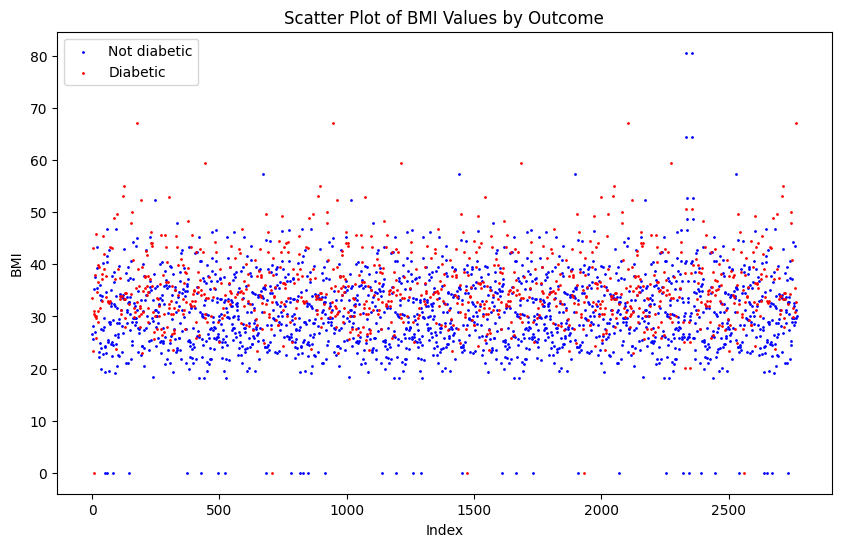

In [46]:
# Let's plot the relationship between a patient's BMI and the presence or absence of diabetes.

# Create a scatter plot for BMI with outcome 0
plt.figure(figsize=(10, 6))
plt.scatter(dataS.index[dataS['Outcome'] == 0], dataS.loc[dataS['Outcome'] == 0, 'BMI'], color='blue', s=1, label='No diabetes')

# Create a scatter plot for BMI with outcome 1
plt.scatter(dataS.index[dataS['Outcome'] == 1], dataS.loc[dataS['Outcome'] == 1, 'BMI'], color='red', s=1, label='Diabetes')

plt.title('Scatter Plot of BMI Values by Outcome')
plt.xlabel('Index')
plt.ylabel('BMI')
plt.legend()
plt.show()

The plot suggests a clear trend between BMI values and diabetes outcomes. Patients with a BMI higher than 30 have a higher likelihood of having diabetes.

Moreover, as a patient's BMI increases, their likelihood of having diabetes also rises. This trend underscores the significance of BMI as a predictive factor for diabetes risk.

### Features correlation

Let's create a heatmap of the correlation between the features in the small dataframe

<Axes: >

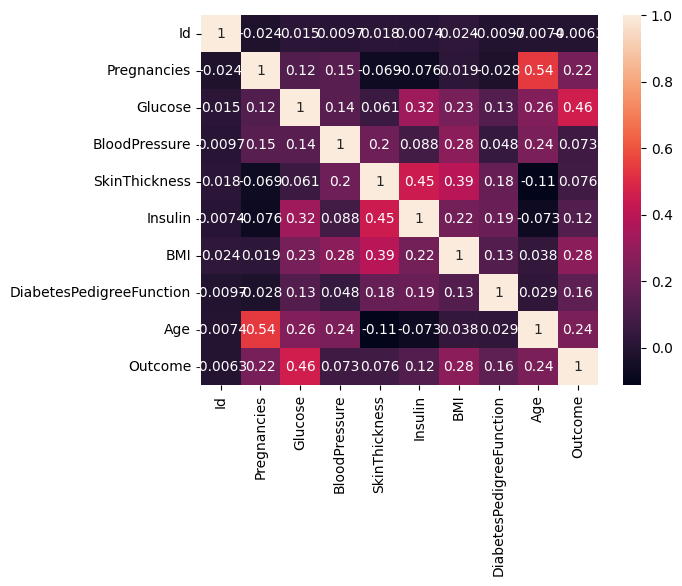

In [52]:
correlation = dataS.corr()
sns.heatmap(correlation, annot=True)

- The correlation analysis reveals that the glucose level is strongly correlated with the diabetes outcome. Additionally, features such as the number of pregnancies, BMI, age, and diabetes pedigree function show positive correlations with the diabetes outcome.

-  Age and the number of pregnancies are positively correlated with each other by 46%.

### Build a model
Based on the data, logistic regression is an appropriate machine learning to predict the outcome for patient. However, we will explore further models like decision tree model

In [57]:
# Splitting the data into features X and target variable Y
X = dataS.drop('Outcome', axis = 'columns')
y = dataS.Outcome

# Scale the features X so that no single feature dominates the learning algorithm
from sklearn.preprocessing import StandardScaler
X_scaled =StandardScaler().fit_transform(X)

In [64]:
# Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2)

### Logistic Regression

In [79]:
np.random.seed(398)
#Logistic Regression
lr = LogisticRegression().fit(X_train, y_train)
lr.score(X_test,y_test)

0.7906137184115524

In [89]:
# Use K-Fold to cross validate our logistic model
cross_val_score(LogisticRegression(), X,y,cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0))

array([0.71119134, 0.73465704, 0.69494585, 0.70216606, 0.78158845])

In [80]:
# Interpret coefficients to understand the impact of different features on the likelihood of having diabetes
for feature, coef in zip(X.columns, lr.coef_[0]):
    print(f'{feature}: {coef}')


Id: -0.03763871458330441
Pregnancies: 0.4136569633660218
Glucose: 1.0438429280239614
BloodPressure: -0.19787089679946568
SkinThickness: -0.05040582558382214
Insulin: -0.04393193868391962
BMI: 0.6720426094371784
DiabetesPedigreeFunction: 0.2991189773851634
Age: 0.17095143542470462


Based on these coefficients, the features that have the greatest impact on the likelihood of having diabetes are Glucose, BMI, and Pregnancies, as they have the largest absolute coefficient values.

These features are the most important predictors of diabetes according to the logistic regression model.

### Decision Tree

In [85]:
np.random.seed(398)
dtc = DecisionTreeClassifier().fit(X_train,y_train)
dtc.score(X_test,y_test)

0.9783393501805054

The decision tree model perform a lot better than the logistic regression.

## Large data

Let's perform data analysis on the large data.

### Data understanding

In [4]:
## Head of the data
dataB.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
# Shape of the data
dataB.shape

(100000, 9)

In [6]:
dataB.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [7]:
dataB.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


The large dataset contains 100,000 rows and 9 columns.

The 'BMI' stands out with an average value of 27. Just like the small data, There are two distinct outcomes represented in the 'Diabetes' column, with 0 for patients without diabetes and 1 indicating patients diagnosed with diabetes.

### Data cleaning

In [8]:
#  Data type
dataB.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [11]:
# Find the range of the Age in the data
min(dataB['age'])

0.08

The min of the age is 0.08 which is not quite right.

After researching, I found that Neonatal diabetes mellitus is a rare form of diabetes that occurs within the first 6 months of life.This can explained why the minimum age is 0.08 years old or 3 weeks after birth.

In [12]:
dataB['age']

0        80.0
1        54.0
2        28.0
3        36.0
4        76.0
         ... 
99995    80.0
99996     2.0
99997    66.0
99998    24.0
99999    57.0
Name: age, Length: 100000, dtype: float64

In [13]:
# Missing values
dataB.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

After cleaning the data, we can visualize the data

### Features relationship

In [16]:
dataB.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


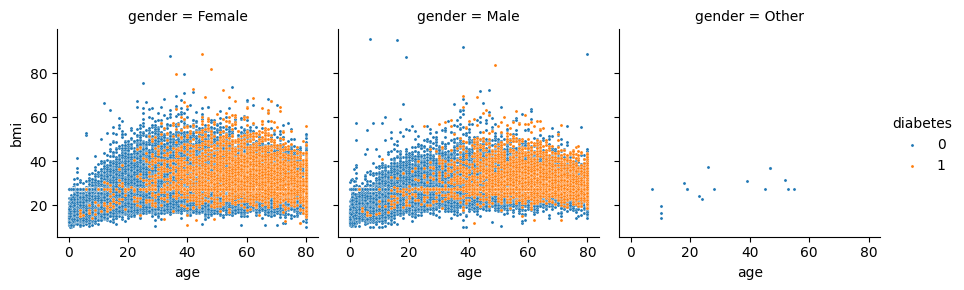

In [21]:
# Plot the relationship between bmi and age for diabetes outcome and gender.
g = sns.FacetGrid(dataB, col="gender", hue="diabetes")
g.map(sns.scatterplot, "age", "bmi", s = 5)
g.add_legend()

The plot above indicates that individuals are more prone to be diagnosed with diabetes once their BMI exceeds 20. Age also significantly influences this trend, as people age, their BMI tends to increase, further contributing to the likelihood of diabetes diagnosis for all genders.

### Features correlation

<Axes: >

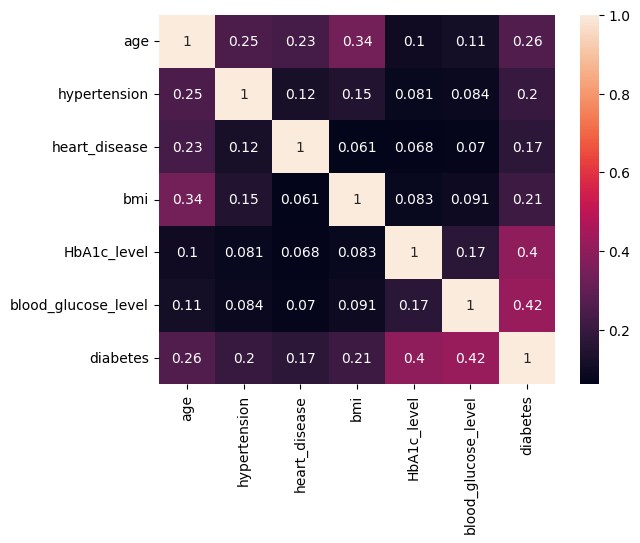

In [22]:
# Let's create a heatmap of the correlation
correlation = dataB.corr()
sns.heatmap(correlation, annot=True)

The correlation analysis reveals that the glucose level and HBA1C level are strongly correlated with the diabetes outcome. Additionally, features such as the number of BMI, age, and whether or not you have hypertension show positive correlations with the diabetes outcome.

BMI and Hypertension outcomes are positively correlated to the age.



### Label Encoding with OneHotEncoding

In [26]:
# Use One Hot Encoding to transform the object column 'gender'
dummies = pd.get_dummies(dataB.gender)
# Drop the smoking history column
dataB2 = pd.concat([dataB,dummies], axis = 'columns').drop(['gender', 'smoking_history'], axis = 'columns')
dataB2.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other
0,80.0,0,1,25.19,6.6,140,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0


### Building the model

Based on the data, we will explore models like logistic regression, decision tree model, Random Forest and Gradient Boosting.

In [27]:
# Splitting the data into features X and target variable Y
X = dataB2.drop('diabetes', axis = 'columns')
y = dataB2.diabetes

# Scale the features X so that no single feature dominates the learning algorithm
from sklearn.preprocessing import StandardScaler
X_scaled =StandardScaler().fit_transform(X)

# Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2)

### Logistic Regression

In [28]:
# Logistic regression
np.random.seed(398)
#Logistic Regression
lr = LogisticRegression().fit(X_train, y_train)
lr.score(X_test,y_test)

0.95855

In [29]:
# Interpret coefficients to understand the impact of different features on the likelihood of having diabetes
for feature, coef in zip(X.columns, lr.coef_[0]):
    print(f'{feature}: {coef}')

age: 1.0365402647552144
hypertension: 0.2045415162735141
heart_disease: 0.14679265233329022
bmi: 0.6198832720896242
HbA1c_level: 2.512658498763825
blood_glucose_level: 1.366169272938464
Female: -0.0704022604954244
Male: 0.07265664224177878
Other: -0.08261582724565746


Based on these coefficients, the features that have the greatest impact on the likelihood of having diabetes are Hemoglobin A1C level, Glucose, BMI, and the age, as they have the largest absolute coefficient values.

These features are the most important predictors of diabetes according to the logistic regression model.

### Random Forest

In [31]:
reg = RandomForestClassifier()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.9672

Random Forest does better than the logistic regression model

### Gradient boosting

In [32]:
gb = GradientBoostingClassifier().fit(X_train,y_train)
gb.score(X_test,y_test)

0.97055